In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('cirrhosis.csv', index_col='ID')
df.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
ID,,,,,,,,,,,,,,,,,,,
1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 1 to 418
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         418 non-null    int64  
 1   Status         418 non-null    object 
 2   Drug           312 non-null    object 
 3   Age            418 non-null    int64  
 4   Sex            418 non-null    object 
 5   Ascites        312 non-null    object 
 6   Hepatomegaly   312 non-null    object 
 7   Spiders        312 non-null    object 
 8   Edema          418 non-null    object 
 9   Bilirubin      418 non-null    float64
 10  Cholesterol    284 non-null    float64
 11  Albumin        418 non-null    float64
 12  Copper         310 non-null    float64
 13  Alk_Phos       312 non-null    float64
 14  SGOT           312 non-null    float64
 15  Tryglicerides  282 non-null    float64
 16  Platelets      407 non-null    float64
 17  Prothrombin    416 non-null    float64
 18  Stage     

In [4]:
df.describe()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,1917.782297,18533.351675,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,1104.672992,3815.845055,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1092.750000,15644.500000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,1730.000000,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,2613.500000,21272.500000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000
max,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


In [5]:
df.isna().sum() 

N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

In [6]:
df.select_dtypes(include=(['int64', 'float64'])).isna().sum() 

N_Days             0
Age                0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

In [7]:
df.select_dtypes(include=(['int64', 'float64'])).isna().sum()
df_num_col = df.select_dtypes(include=(['int64', 'float64'])).columns
for c in df_num_col:
    df[c].fillna(df[c].median(), inplace=True)

df.select_dtypes(include=(['int64', 'float64'])).isna().sum()

N_Days           0
Age              0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [8]:
df_cat_col = df.select_dtypes(include=('object')).columns
for c in df_cat_col:
    df[c].fillna(df[c].mode().values[0], inplace=True)
    
df.select_dtypes(include=('object')).isna().sum()

Status          0
Drug            0
Sex             0
Ascites         0
Hepatomegaly    0
Spiders         0
Edema           0
dtype: int64

In [9]:
df['Stage'].value_counts()

3.0    161
4.0    144
2.0     92
1.0     21
Name: Stage, dtype: int64

Text(0.5, 1.0, 'Number of Example Per Class')

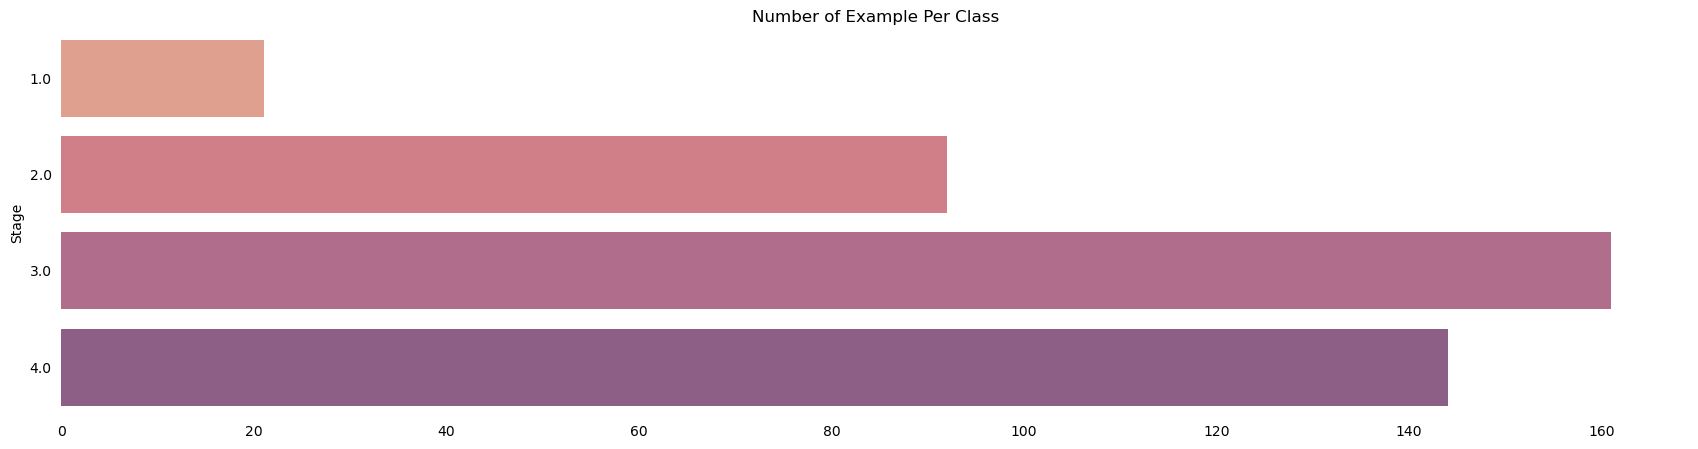

In [10]:
plt.figure(figsize=(21,5))
sns.countplot(y=df['Stage'], palette="flare", alpha=0.8, )
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Number of Example Per Class')

In [11]:
df['Stage'] = np.where(df['Stage'] == 4,1,0)

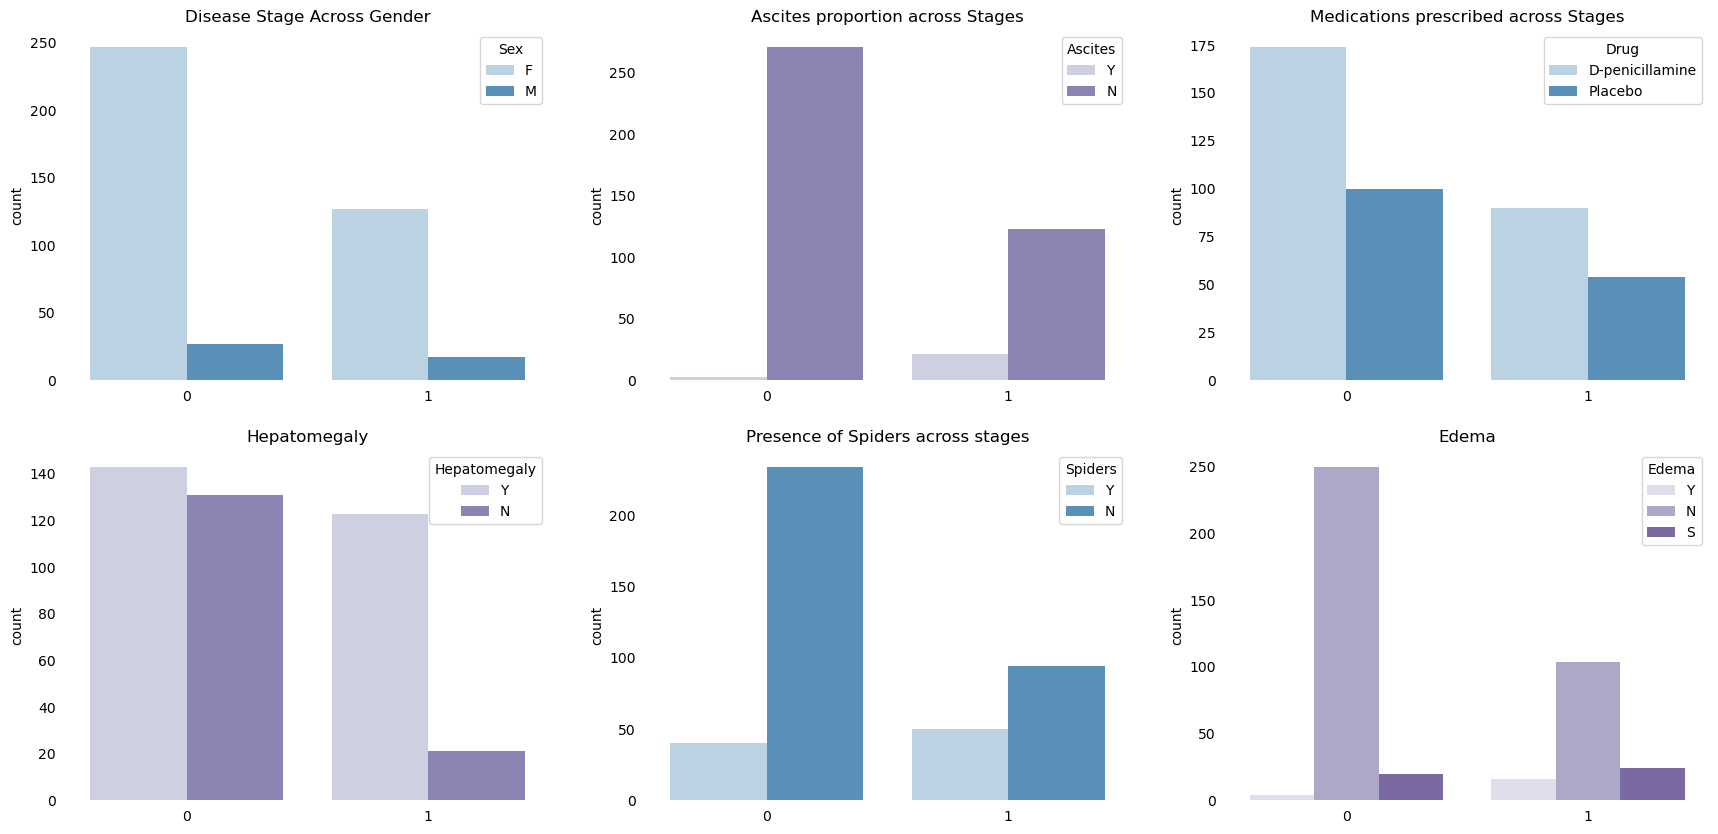

In [12]:
plt.figure(figsize=(21.2,10))
plt.subplot(2,3,1)
sns.countplot(x=df['Stage'], hue=df['Sex'], palette='Blues', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Disease Stage Across Gender')
plt.subplot(2,3,2)
sns.countplot(x=df['Stage'], hue=df['Ascites'], palette='Purples', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Ascites proportion across Stages')
plt.subplot(2,3,3)
sns.countplot(x=df['Stage'], hue=df['Drug'], palette='Blues', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Medications prescribed across Stages');
plt.subplot(2,3,4)
sns.countplot(x=df['Stage'], hue=df['Hepatomegaly'], palette='Purples', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Hepatomegaly');
plt.subplot(2,3,5)
sns.countplot(x=df['Stage'], hue=df['Spiders'], palette='Blues', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Presence of Spiders across stages');
plt.subplot(2,3,6)
sns.countplot(x=df['Stage'], hue=df['Edema'], palette='Purples', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Edema');

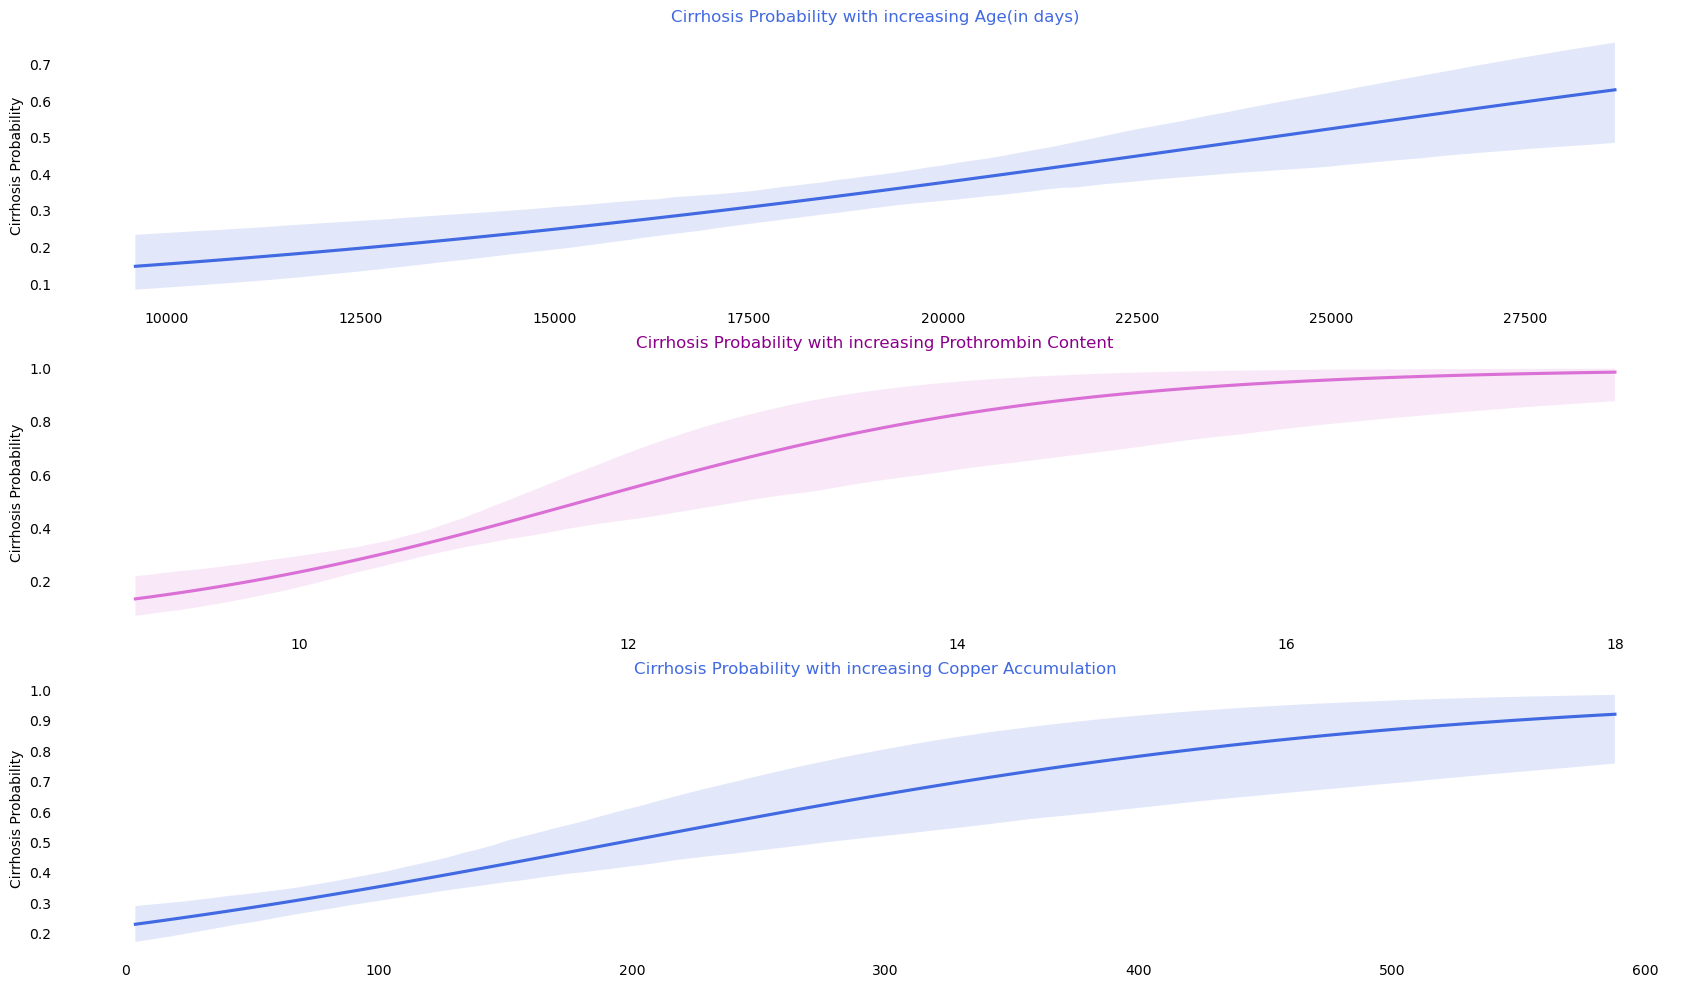

In [13]:
plt.figure(figsize=(21,12))

plt.subplot(3,1,1)
sns.regplot(x=df['Age'], y=df['Stage'], scatter=False, logistic=True, color='royalblue')
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False);
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('');
plt.ylabel('Cirrhosis Probability');
plt.setp(plt.title('Cirrhosis Probability with increasing Age(in days)'), color='royalblue') ;
plt.subplot(3,1,2)
sns.regplot(x=df['Prothrombin'], y=df['Stage'], scatter=False, logistic=True, color='orchid');
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False);
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('');
plt.ylabel('Cirrhosis Probability');
plt.setp(plt.title('Cirrhosis Probability with increasing Prothrombin Content'), color='darkmagenta');
plt.subplot(3,1,3)
sns.regplot(x=df['Copper'], y=df['Stage'], scatter=False, logistic=True, color='royalblue')
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False);
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('');
plt.ylabel('Cirrhosis Probability');
plt.setp(plt.title('Cirrhosis Probability with increasing Copper Accumulation'), color='royalblue') ;


In [14]:
df['Sex'] = df['Sex'].replace({'M':0, 'F':1})                                # Male : 0 , Female :1
df['Ascites'] = df['Ascites'].replace({'N':0, 'Y':1})                        # N : 0, Y : 1   
df['Drug'] = df['Drug'].replace({'D-penicillamine':0, 'Placebo':1})          # D-penicillamine : 0, Placebo : 1   
df['Hepatomegaly'] = df['Hepatomegaly'].replace({'N':0, 'Y':1})              # N : 0, Y : 1
df['Spiders'] = df['Spiders'].replace({'N':0, 'Y':1})                        # N : 0, Y : 1
df['Edema'] = df['Edema'].replace({'N':0, 'Y':1, 'S':-1})                    # N : 0, Y : 1, S : -1
df['Status'] = df['Status'].replace({'C':0, 'CL':1, 'D':-1})                 # 'C':0, 'CL':1, 'D':-1

In [15]:

X = df.drop(['Status', 'N_Days', 'Stage'], axis=1)
y = df.pop('Stage')


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

log_model = LogisticRegression(max_iter=5000, solver='saga')
skf = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)

acc=[]
def training(train, test, fold_no):
  X_train = train
  y_train = y.iloc[train_index]
  X_test = test
  y_test = y.iloc[test_index]
  log_model.fit(X_train, y_train)
  score = log_model.score(X_test,y_test)
  acc.append(score)
  print('For Fold {} the accuracy is {}'.format(str(fold_no),score))
fold_no = 1
for train_index,test_index in skf.split(X, y):
  train = X.iloc[train_index,:]
  test = X.iloc[test_index,:]
  training(train, test, fold_no)
  fold_no += 1
print()
print('Logestic Regression Mean Accuracy = ', np.mean(acc))

For Fold 1 the accuracy is 0.6904761904761905
For Fold 2 the accuracy is 0.7857142857142857
For Fold 3 the accuracy is 0.6190476190476191
For Fold 4 the accuracy is 0.6666666666666666
For Fold 5 the accuracy is 0.8095238095238095
For Fold 6 the accuracy is 0.6666666666666666
For Fold 7 the accuracy is 0.6904761904761905
For Fold 8 the accuracy is 0.7380952380952381
For Fold 9 the accuracy is 0.7317073170731707
For Fold 10 the accuracy is 0.6341463414634146

Logestic Regression Mean Accuracy =  0.7032520325203252


In [17]:
from sklearn.metrics import classification_report
log_model_predict = log_model.predict(test)
log_model_predict_proba = log_model.predict_proba(test)

print(classification_report(y.iloc[test_index], log_model_predict))

              precision    recall  f1-score   support

           0       0.70      0.78      0.74        27
           1       0.45      0.36      0.40        14

    accuracy                           0.63        41
   macro avg       0.58      0.57      0.57        41
weighted avg       0.62      0.63      0.62        41



In [18]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

fpr, tpr, threshold = roc_curve(y.iloc[test_index], log_model_predict_proba[:,1])
roc_auc = auc(fpr, tpr)

print('AUC : ', roc_auc_score(y.iloc[test_index], log_model_predict_proba[:,1]))

AUC :  0.6507936507936508


C:\Users\saksh\AppData\Local\Temp\ipykernel_22860\4063126345.py:16: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=fpr, y=tpr, label=f'AUC = {roc_auc:.2f}', palette='purple', linewidth=3)


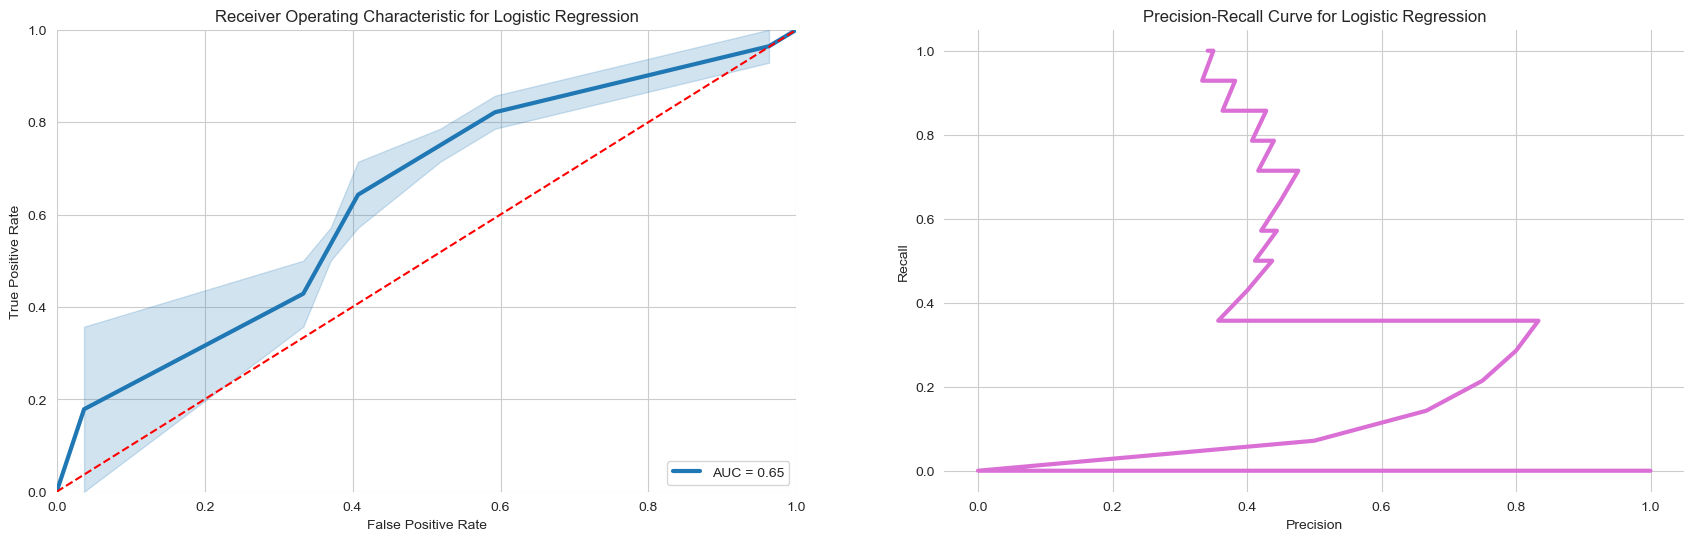

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve

# Set the Seaborn style
sns.set_style('whitegrid')

# Create a figure with a specific size
plt.figure(figsize=(21, 6))

# Plot the ROC curve
plt.subplot(1, 2, 1)
plt.title('Receiver Operating Characteristic for Logistic Regression')

# Plot the ROC curve using lineplot
sns.lineplot(x=fpr, y=tpr, label=f'AUC = {roc_auc:.2f}', palette='purple', linewidth=3)

# Add the diagonal line (representing a random classifier)
plt.plot([0, 1], [0, 1], 'r--')

# Set axis limits and labels
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# Customize the legend and plot appearance
plt.legend(loc='lower right')
plt.tick_params(left=False, bottom=False)
sns.despine(top=True, bottom=True, left=True)

# Plot the Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y.iloc[test_index], log_model_predict_proba[:, 1])

plt.subplot(1, 2, 2)
plt.plot(precision, recall, linewidth=3, color='orchid')

# Customize the Precision-Recall curve appearance
sns.despine(top=True, bottom=True, left=True)
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision-Recall Curve for Logistic Regression')

# Show the plots
plt.show()


In [20]:
import pickle
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
skf = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
model = XGBClassifier(learning_rate=0.75, max_depth=3, random_state=1, gamma=0, eval_metric='error')
acc=[]
def training(train, test, fold_no):
  X_train = train
  y_train = y.iloc[train_index]
  X_test = test
  y_test = y.iloc[test_index]
  model.fit(X_train, y_train)
  score = model.score(X_test,y_test)
  acc.append(score)
  print('For Fold {} the accuracy is {}'.format(str(fold_no),score))
fold_no = 1
for train_index,test_index in skf.split(X, y):
  train = X.iloc[train_index,:]
  test = X.iloc[test_index,:]
  training(train, test, fold_no)
  fold_no += 1
print()
print('XGboost model Mean Accuracy = ', np.mean(acc))
with open("cirrhosis_model1.pkl", "wb") as f:
    pickle.dump(model, f)

For Fold 1 the accuracy is 0.7857142857142857
For Fold 2 the accuracy is 0.7619047619047619
For Fold 3 the accuracy is 0.6428571428571429
For Fold 4 the accuracy is 0.7380952380952381
For Fold 5 the accuracy is 0.7619047619047619
For Fold 6 the accuracy is 0.7142857142857143
For Fold 7 the accuracy is 0.7142857142857143
For Fold 8 the accuracy is 0.7619047619047619
For Fold 9 the accuracy is 0.6829268292682927
For Fold 10 the accuracy is 0.7804878048780488

XGboost model Mean Accuracy =  0.7344367015098723


In [21]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Stratified KFold
skf = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)

# Initialize RandomForest or SVM model
# For RandomForest
# model_rf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=1)

# For SVM
model_svm = SVC(kernel='linear', random_state=1)

# List to store accuracy scores
acc = []

def training(train, test, fold_no, model):
    X_train = train
    y_train = y.iloc[train_index]
    X_test = test
    y_test = y.iloc[test_index]
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict and calculate accuracy
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    
    acc.append(score)
    print(f'For Fold {fold_no} the accuracy is {score}')

fold_no = 1

# Loop through each fold of Stratified KFold
for train_index, test_index in skf.split(X, y):
    train = X.iloc[train_index, :]
    test = X.iloc[test_index, :]
    
    # Choose the model (Random Forest or SVM)
#     model = model_rf  # For Random Forest
    model = model_svm  # For SVM
    
    training(train, test, fold_no, model)
    fold_no += 1

# Output the mean accuracy
print(f'\nModel Mean Accuracy = {np.mean(acc)}')


For Fold 1 the accuracy is 0.7142857142857143
For Fold 2 the accuracy is 0.7619047619047619
For Fold 3 the accuracy is 0.5952380952380952
For Fold 4 the accuracy is 0.6666666666666666
For Fold 5 the accuracy is 0.7142857142857143
For Fold 6 the accuracy is 0.6904761904761905
For Fold 7 the accuracy is 0.7380952380952381
For Fold 8 the accuracy is 0.7619047619047619
For Fold 9 the accuracy is 0.7073170731707317
For Fold 10 the accuracy is 0.7317073170731707

Model Mean Accuracy = 0.7081881533101044


In [22]:
from sklearn.metrics import classification_report

# Ensure test data is in the correct format
test = test.values if isinstance(test, pd.DataFrame) else test

# Ensure the model's prediction methods are called correctly
XGB_model_predict = model.predict(test)

# Predict probabilities only if supported
try:
    XGB_model_predict_proba = model.predict_proba(test)
except AttributeError:
    XGB_model_predict_proba = None

# Ensure y.iloc[test_index] is valid
y_test = y.iloc[test_index] if isinstance(y, pd.Series) else y[test_index]

# Print classification report
print(classification_report(y_test, XGB_model_predict))


              precision    recall  f1-score   support

           0       0.77      0.85      0.81        27
           1       0.64      0.50      0.56        14

    accuracy                           0.73        41
   macro avg       0.70      0.68      0.68        41
weighted avg       0.72      0.73      0.72        41



C:\Users\saksh\anaconda3\annaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [23]:
from sklearn.metrics import roc_auc_score, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure test data is in the correct format
test = test.values if isinstance(test, pd.DataFrame) else test

# Predict probabilities or handle missing method
try:
    if hasattr(model, "predict_proba"):
        XGB_model_predict_proba = model.predict_proba(test)
    elif hasattr(model, "decision_function"):
        # Convert decision function output to probabilities
        decision_scores = model.decision_function(test)
        XGB_model_predict_proba = (decision_scores - decision_scores.min()) / \
                                  (decision_scores.max() - decision_scores.min())
    else:
        raise AttributeError("The model does not support predict_proba or decision_function.")
except Exception as e:
    print("Error during prediction:", str(e))
    raise

# Inspect the predicted probabilities
print("Shape of XGB_model_predict_proba:", XGB_model_predict_proba.shape)

# Handle binary classification probability
if XGB_model_predict_proba.ndim == 2 and XGB_model_predict_proba.shape[1] == 2:
    positive_class_proba = XGB_model_predict_proba[:, 1]
else:
    positive_class_proba = XGB_model_predict_proba  # Use directly if already 1D

# Ensure y.iloc[test_index] is valid
y_test = y.iloc[test_index] if isinstance(y, pd.Series) else y[test_index]

# Calculate ROC curve
fpr, tpr, threshold = roc_curve(y_test, positive_class_proba)
roc_auc = auc(fpr, tpr)

# Print AUC score
print('AUC:', roc_auc_score(y_test, positive_class_proba))




Shape of XGB_model_predict_proba: (41,)
AUC: 0.7433862433862434


C:\Users\saksh\anaconda3\annaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [24]:

df['Drug'].unique()


array([0, 1], dtype=int64)

In [25]:
!pip install shap

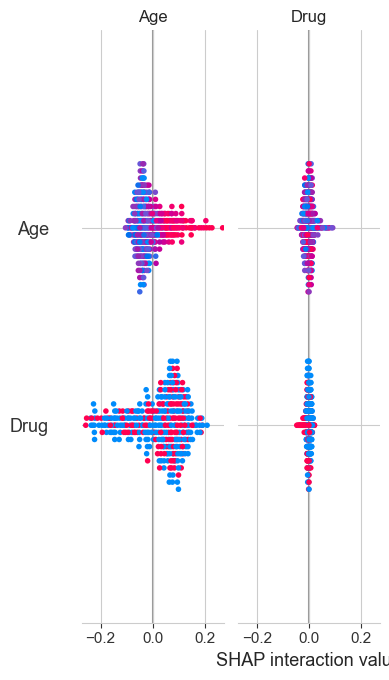

In [26]:
import shap
from sklearn.ensemble import RandomForestClassifier         # using random forest to explain for ease
rfc = RandomForestClassifier(max_features=2,n_estimators=100,bootstrap=True)

rfc.fit(train, y.iloc[train_index])

explainer = shap.TreeExplainer(rfc)

# calculate shap values. This is what we will plot.
shap_values = explainer.shap_values(train)
shap.summary_plot(shap_values, train, plot_size=(20,30), alpha=0.2, plot_type='bar')

In [27]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
import pickle

# Read the data
df = pd.read_csv('cirrhosis.csv')
print(df['Drug'].unique())

# List of columns to be used for scaling
# Select 'Age' and all 'float64' columns except 'Stage', 'ID', 'N_Days', and 'Status'
numerical_columns = ['Age'] + df.select_dtypes(include=['float64']).columns.tolist()

# Remove 'Stage', 'ID', 'N_Days', and 'Status' columns from the list
columns_to_remove = ['Stage', 'ID', 'N_Days', 'Status']
numerical_columns = [col for col in numerical_columns if col not in columns_to_remove]

# List of categorical columns (all object types except the removed columns)
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
categorical_columns = [col for col in categorical_columns if col not in columns_to_remove]

# Prepare the data for scaling
# Handle missing values
# For categorical columns, fill missing values with a constant (e.g., 'Unknown')
# For numerical columns, fill missing values with the median of each column

data_numerical = df[numerical_columns]
data_categorical = df[categorical_columns]

# Handle missing values in numerical columns
numerical_imputer = SimpleImputer(strategy='median')
data_numerical = numerical_imputer.fit_transform(data_numerical)

# Handle missing values in categorical columns
categorical_imputer = SimpleImputer(strategy='constant', fill_value='Unknown')
data_categorical = categorical_imputer.fit_transform(data_categorical)

# Convert categorical columns to numeric using LabelEncoder
label_encoders = {}
for col in categorical_columns:
    encoder = LabelEncoder()
    # Encode the categorical data (transforming to numeric values)
    data_categorical[:, categorical_columns.index(col)] = encoder.fit_transform(data_categorical[:, categorical_columns.index(col)])
    label_encoders[col] = encoder

# Combine numerical and encoded categorical data
data_combined = pd.DataFrame(data_numerical, columns=numerical_columns)
data_categorical_df = pd.DataFrame(data_categorical, columns=categorical_columns)

# Concatenate the numerical and categorical data
data_combined = pd.concat([data_combined, data_categorical_df], axis=1)

# Train the scaler (StandardScaler)
scaler = StandardScaler()
scaler.fit(data_combined)

# Save the scaler to a file
with open("scaler1.pkl", "wb") as f:
    pickle.dump(scaler, f)

# Save label encoders if needed (optional)
with open("label_encoders.pkl", "wb") as f:
    pickle.dump(label_encoders, f)

print("Scaler and label encoders saved as 'scaler1.pkl' and 'label_encoders.pkl'")
print(data_combined['Drug'].unique())


['D-penicillamine' 'Placebo' nan]
Scaler and label encoders saved as 'scaler1.pkl' and 'label_encoders.pkl'
[0 1 2]
